# Analysis of Adult Body Measurements Using NHANES Data

## Introduction

This project analyses body measurement data of adult male and female participants
from the National Health and Nutrition Examination Survey (NHANES).
The objective is to explore, compare, and interpret various anthropometric
measurements using numerical summaries and visualisations.

The analysis is performed using NumPy for matrix operations and Matplotlib
for data visualisation.


# Capstone Project 1: NHANES Body Measurements Analysis (NumPy Matrices)

## 1. Objective
The objective of this analysis is to explore and compare body measurements of adult
male and female participants from the NHANES dataset using NumPy matrices and
Matplotlib visualisations.

## 2. Dataset Description
Two datasets were used:
- nhanes_adult_male_bmx_2020.csv
- nhanes_adult_female_bmx_2020.csv

Each row corresponds to one participant. The dataset contains body measurements
including weight, height, limb lengths, and body circumferences.

## 3. Data Loading and Verification


## Importing Required Libraries

In this section, the required Python libraries are imported. NumPy is used for matrix-based
data handling, Matplotlib is used for visualisation, and SciPy is used for statistical
computations such as correlation and skewness.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


The libraries were imported successfully. These tools will be used throughout the notebook
for data processing, plotting, and computing statistical summaries.


### Loading the data
In this step, the datasets are loaded as NumPy matrices. This is required because the
analysis will be performed using matrix-based NumPy operations.


In [3]:
male = np.genfromtxt(
    "nhanes_adult_male_bmx_2020.csv",
    delimiter=",",
    skip_header=1
)

female = np.genfromtxt(
    "nhanes_adult_female_bmx_2020.csv",
    delimiter=",",
    skip_header=1
)



The datasets have been loaded into the matrices `male` and `female`. Any missing values
in the CSV files are handled by NumPy, which ensures that the dataset can still be used
for analysis.


## Verifying the Loaded Data

Before performing analysis, the shape and a few sample rows are printed to confirm that
the data has been read correctly and contains the expected number of columns.


In [4]:
print("Male shape:", male.shape)
print("Female shape:", female.shape)

print("First row male:", male[0])
print("First row female:", female[0])


Male shape: (4082, 7)
Female shape: (4222, 7)
First row male: [nan nan nan nan nan nan nan]
First row female: [nan nan nan nan nan nan nan]


The output confirms that the matrices were loaded correctly. The number of columns matches
the expected body measurements, and the sample values appear realistic for human body data.


## Question 3: Histograms of Female and Male Weights

This section visualises the distribution of body weights for female and male participants
using histograms. Both histograms use identical x-axis limits to allow a fair comparison
between the two groups.


In [5]:
male_weights = male[:, 0]
female_weights = female[:, 0]


In [8]:
min_weight = min(np.nanmin(male_weights), np.nanmin(female_weights))
max_weight = max(np.nanmax(male_weights), np.nanmax(female_weights))



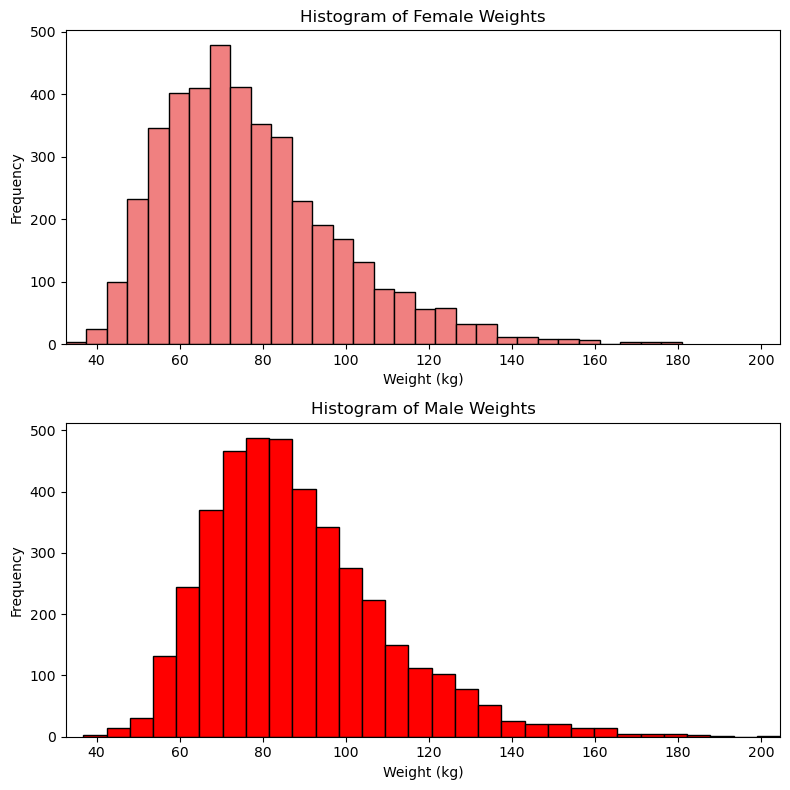

In [11]:
plt.figure(figsize=(8, 8))

# Female weights (top)
plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30, color="lightcoral", edgecolor="black")
plt.title("Histogram of Female Weights")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(min_weight, max_weight)

# Male weights (bottom)
plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30, color="red", edgecolor="black")
plt.title("Histogram of Male Weights")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(min_weight, max_weight)

plt.tight_layout()
plt.show()


The histograms show that male weights are generally higher than female weights.
The male distribution is slightly more spread out, with more observations appearing
in the higher weight ranges. Using the same x-axis limits makes the comparison
between the two groups easier and more reliable.


## Question 4: Boxplot Comparison of Body Weights

A box-and-whisker plot is created to compare female and male body weights side by side.
This plot highlights differences in median values, spread, and the presence of outliers.


In [13]:
female_weights_clean = female_weights[~np.isnan(female_weights)]
male_weights_clean = male_weights[~np.isnan(male_weights)]


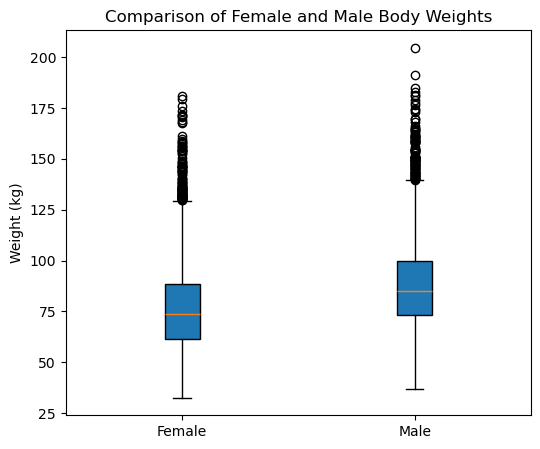

In [14]:
plt.figure(figsize=(6, 5))

plt.boxplot(
    [female_weights_clean, male_weights_clean],
    labels=["Female", "Male"],
    patch_artist=True
)

plt.ylabel("Weight (kg)")
plt.title("Comparison of Female and Male Body Weights")

plt.show()


Prior to constructing the box-and-whisker plot, missing values were removed from
the weight data. The resulting plot indicates that male participants generally have
a higher median body weight and greater variability compared to female participants.


## Question 5: Numerical Summary of Body Weights

In this section, numerical measures of location, dispersion, and shape are computed for
male and female weights. These statistics help quantify differences that were observed
in the plots.


In [15]:
def describe_weights(x):
    return {
        "count": len(x),
        "mean": np.mean(x),
        "median": np.median(x),
        "std_dev": np.std(x, ddof=1),
        "min": np.min(x),
        "max": np.max(x),
        "Q1": np.percentile(x, 25),
        "Q3": np.percentile(x, 75),
        "IQR": np.percentile(x, 75) - np.percentile(x, 25),
        "skewness": stats.skew(x, nan_policy="omit")
    }

female_stats = describe_weights(female_weights_clean)
male_stats = describe_weights(male_weights_clean)

print("Female weight statistics:\n", female_stats)
print("\nMale weight statistics:\n", male_stats)


Female weight statistics:
 {'count': 4221, 'mean': np.float64(77.40379057095475), 'median': np.float64(73.6), 'std_dev': np.float64(21.545060568892968), 'min': np.float64(32.6), 'max': np.float64(180.9), 'Q1': np.float64(61.6), 'Q3': np.float64(88.7), 'IQR': np.float64(27.1), 'skewness': np.float64(1.03336107186799)}

Male weight statistics:
 {'count': 4081, 'mean': np.float64(88.36454300416565), 'median': np.float64(85.0), 'std_dev': np.float64(21.421561426840427), 'min': np.float64(36.8), 'max': np.float64(204.6), 'Q1': np.float64(73.3), 'Q3': np.float64(99.8), 'IQR': np.float64(26.5), 'skewness': np.float64(0.9842810741662347)}


In [16]:
for key in female_stats:
    print(f"{key:10s} | Female: {female_stats[key]:.2f}  | Male: {male_stats[key]:.2f}")


count      | Female: 4221.00  | Male: 4081.00
mean       | Female: 77.40  | Male: 88.36
median     | Female: 73.60  | Male: 85.00
std_dev    | Female: 21.55  | Male: 21.42
min        | Female: 32.60  | Male: 36.80
max        | Female: 180.90  | Male: 204.60
Q1         | Female: 61.60  | Male: 73.30
Q3         | Female: 88.70  | Male: 99.80
IQR        | Female: 27.10  | Male: 26.50
skewness   | Female: 1.03  | Male: 0.98


The numerical summaries confirm that male participants have a higher average and
median weight compared to females. The dispersion measures (standard deviation and
interquartile range) suggest that male weights vary more than female weights.
The skewness values indicate whether each distribution is symmetric or has a longer
tail; a positive skewness implies the presence of higher-weight outliers.


## Question 6: Computing Body Mass Index (BMI) for Female Participants

BMI is calculated using weight in kilograms and height in meters. It provides a height-adjusted
measure of body size, which is more informative than weight alone. The BMI values are added as
an additional column to the female matrix.


In [17]:
female_weight = female[:, 0]
female_height_cm = female[:, 1]


In [18]:
valid_female = (~np.isnan(female_weight)) & (~np.isnan(female_height_cm))

female_clean = female[valid_female]


In [19]:
female_weight_clean = female_clean[:, 0]
female_height_m_clean = female_clean[:, 1] / 100

female_bmi = female_weight_clean / (female_height_m_clean ** 2)
female_bmi = female_bmi.reshape(-1, 1)

female = np.hstack((female_clean, female_bmi))


In [20]:
print("New female shape:", female.shape)
print("First row with BMI:", female[0])


New female shape: (4221, 8)
First row with BMI: [ 97.1        160.2         34.7         40.8         35.8
 126.1        117.9         37.83504078]


BMI was computed for each female participant using weight in kilograms and height
in meters. The BMI values were appended as an additional (eighth) column to the
female matrix to support further standardisation and correlation analysis.


## Question 7: Creating a Standardised Female Dataset (zfemale)

The female dataset is standardised using z-scores so that all variables have mean 0 and
standard deviation 1. This is important because the variables are measured in different
units (e.g., kilograms vs centimetres).


In [21]:
zfemale = (female - np.mean(female, axis=0)) / np.std(female, axis=0, ddof=1)


In [22]:
print("Mean of each column (should be close to 0):")
print(np.mean(zfemale, axis=0))

print("\nStd dev of each column (should be close to 1):")
print(np.std(zfemale, axis=0, ddof=1))


Mean of each column (should be close to 0):
[ 6.42992990e-15  9.90079060e-15 -7.52073388e-14 -1.27129348e-14
  1.36356745e-15 -5.65274748e-15  6.48156145e-15 -1.23489626e-15]

Std dev of each column (should be close to 1):
[1. 1. 1. 1. 1. 1. 1. 1.]


The matrix `zfemale` was created by standardising each column of the female dataset
using z-scores. This transformation ensures that all variables have comparable scales
(mean 0 and standard deviation 1), enabling meaningful comparison and correlation
analysis.


## Question 8: Scatterplot Matrix and Correlation Analysis (Females)

A scatterplot matrix is generated for the standardised female measurements: height, weight,
waist circumference, hip circumference, and BMI. Pearson and Spearman correlations are then
computed to quantify the relationships between all pairs of variables.


In [23]:
cols = [1, 0, 6, 5, 7]
labels = ["Height", "Weight", "Waist", "Hip", "BMI"]

data = zfemale[:, cols]


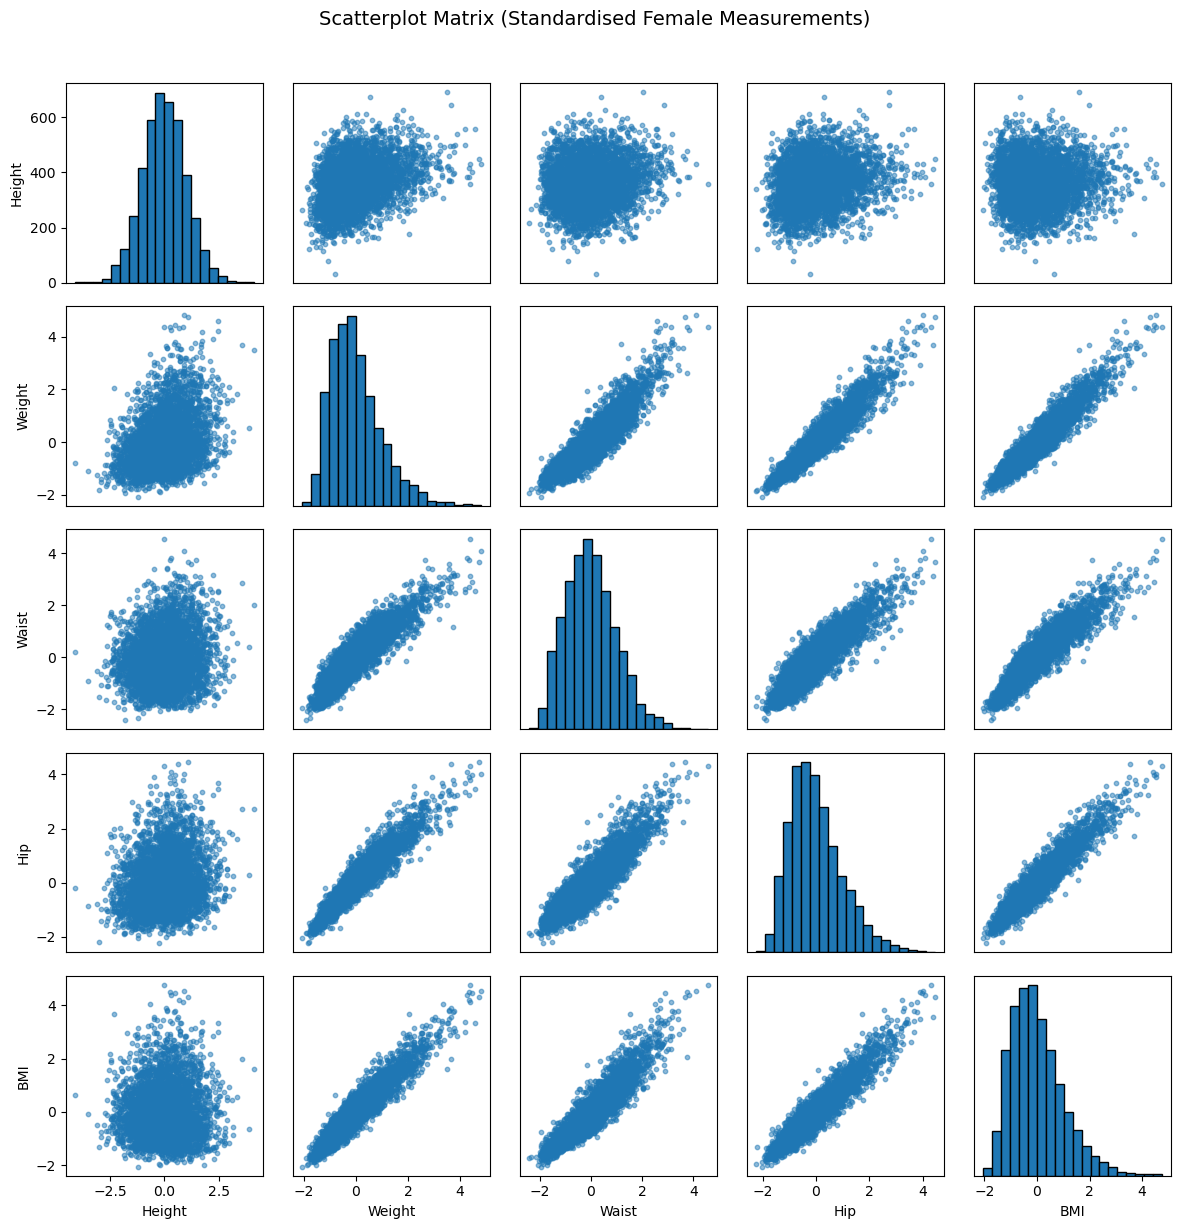

In [24]:
n = len(labels)

plt.figure(figsize=(12, 12))

for i in range(n):
    for j in range(n):
        plt.subplot(n, n, i*n + j + 1)

        if i == j:
            # Diagonal: histogram
            plt.hist(data[:, j], bins=20, edgecolor="black")
        else:
            # Off-diagonal: scatterplot
            plt.scatter(data[:, j], data[:, i], s=10, alpha=0.5)

        # Axis labels only on the outer plots (to keep it clean)
        if i == n - 1:
            plt.xlabel(labels[j])
        else:
            plt.xticks([])

        if j == 0:
            plt.ylabel(labels[i])
        else:
            plt.yticks([])

plt.suptitle("Scatterplot Matrix (Standardised Female Measurements)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


In [25]:
print("Pearson Correlation Matrix:\n")
pearson_corr = np.corrcoef(data, rowvar=False)
print(pearson_corr)


Pearson Correlation Matrix:

[[1.         0.34549627 0.12654714 0.20289468 0.03307725]
 [0.34549627 1.         0.90455038 0.94655347 0.94590048]
 [0.12654714 0.90455038 1.         0.89740696 0.92119833]
 [0.20289468 0.94655347 0.89740696 1.         0.94419901]
 [0.03307725 0.94590048 0.92119833 0.94419901 1.        ]]


In [28]:
print("Spearman Correlation Matrix:\n")
spearman_corr, _ = stats.spearmanr(data)
print(spearman_corr)


Spearman Correlation Matrix:

[[1.         0.33885953 0.10858666 0.2054051  0.01989651]
 [0.33885953 1.         0.90016929 0.94663413 0.93799913]
 [0.10858666 0.90016929 1.         0.8880374  0.92311387]
 [0.2054051  0.94663413 0.8880374  1.         0.93419601]
 [0.01989651 0.93799913 0.92311387 0.93419601 1.        ]]


The scatterplot matrix reveals strong positive relationships between several body
measurements. In particular, weight tends to increase with hip and waist
circumference. BMI is also positively associated with weight and waist measurements.

The Pearson correlation coefficients quantify linear relationships, while the Spearman
coefficients measure monotonic associations based on ranks. Similar values between
Pearson and Spearman suggest approximately linear relationships, whereas noticeable
differences may indicate non-linear but still monotonic trends.


## Question 9: Computing Waist-to-Height and Waist-to-Hip Ratios

Two additional health-related ratios are computed for both male and female participants:
waist-to-height ratio and waist-to-hip ratio. These metrics are widely used to assess central
obesity and fat distribution patterns.


In [29]:
male_weight = male[:, 0]
male_height_cm = male[:, 1]
male_hip = male[:, 5]
male_waist = male[:, 6]

valid_male = (~np.isnan(male_height_cm)) & (~np.isnan(male_hip)) & (~np.isnan(male_waist))
male_clean = male[valid_male]


In [30]:
female_height_cm = female[:, 1]
female_hip = female[:, 5]
female_waist = female[:, 6]

valid_female2 = (~np.isnan(female_height_cm)) & (~np.isnan(female_hip)) & (~np.isnan(female_waist))
female_clean2 = female[valid_female2]



In [31]:
# MALE RATIOS
male_wthr = (male_clean[:, 6] / male_clean[:, 1]).reshape(-1, 1)  # waist/height
male_whr = (male_clean[:, 6] / male_clean[:, 5]).reshape(-1, 1)   # waist/hip

male = np.hstack((male_clean, male_wthr, male_whr))


# FEMALE RATIOS
female_wthr = (female_clean2[:, 6] / female_clean2[:, 1]).reshape(-1, 1)
female_whr = (female_clean2[:, 6] / female_clean2[:, 5]).reshape(-1, 1)

female = np.hstack((female_clean2, female_wthr, female_whr))


In [32]:
print("Male shape after ratios:", male.shape)
print("Female shape after ratios:", female.shape)


Male shape after ratios: (4081, 9)
Female shape after ratios: (4221, 10)


## Question 10: Boxplot Comparison of Waist Ratios

A boxplot with four side-by-side boxes is used to compare waist-to-height ratio and waist-to-hip
ratio across male and female participants. This provides a clear visual comparison of medians,
spread, and outliers across the groups.


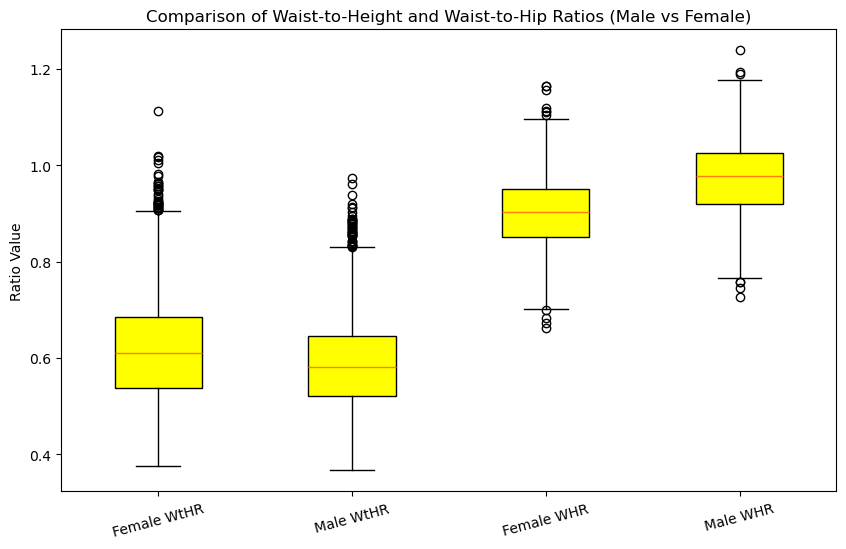

In [34]:
plt.figure(figsize=(10, 6))

bp = plt.boxplot(
    [female_wthr_vals, male_wthr_vals, female_whr_vals, male_whr_vals],
    labels=["Female WtHR", "Male WtHR", "Female WHR", "Male WHR"],
    patch_artist=True
)

# Make all boxes yellow
for box in bp["boxes"]:
    box.set(facecolor="yellow")

plt.ylabel("Ratio Value")
plt.title("Comparison of Waist-to-Height and Waist-to-Hip Ratios (Male vs Female)")
plt.xticks(rotation=15)
plt.show()


The ratios help compare body fat distribution patterns between males and females. Waist-to-height
ratio focuses on central obesity relative to height, while waist-to-hip ratio reflects the proportion
between waist size and hip size. Differences in medians and spreads indicate that fat distribution
patterns vary by gender.


## Question 11: Advantages and Disadvantages of BMI, WtHR, and WHR


## Advantages and Disadvantages of BMI, Waist-to-Height Ratio, and Waist-to-Hip Ratio

### Body Mass Index (BMI)
**Advantages:**
- Easy to calculate using only height and weight.
- Useful for large-scale population-level screening.
- Provides a quick estimate of whether a person is underweight, normal weight, or overweight.

**Disadvantages:**
- Does not distinguish between fat mass and muscle mass (e.g., athletes may have high BMI but low fat).
- Does not indicate fat distribution (abdominal vs. peripheral fat).
- May not be equally accurate across different age groups and body types.

---

### Waist-to-Height Ratio (WtHR)
**Advantages:**
- Captures central obesity (abdominal fat) more directly than BMI.
- Simple to compute and interpret.
- Often considered a better indicator of cardiometabolic risk compared to BMI.

**Disadvantages:**
- Does not account for overall body composition (muscle vs fat).
- Measurement accuracy depends on correct waist measurement.
- Health cut-offs may vary slightly across populations.

---

### Waist-to-Hip Ratio (WHR)
**Advantages:**
- Indicates body fat distribution (e.g., “apple-shaped” vs “pear-shaped” patterns).
- Useful for assessing risk related to abdominal obesity.
- Can provide additional insights beyond BMI.

**Disadvantages:**
- Can be influenced by both waist and hip measurements, which may introduce variability.
- Requires careful and consistent measurement technique.
- May not fully reflect total body fat percentage.


## Question 12: Standardised Measurements for Extreme BMI Values (Females)

To better understand the differences between participants at the extremes, the five females with
the lowest BMI and the five females with the highest BMI are identified. Their standardised body
measurements are printed for comparison.


In [35]:
zfemale2 = (female - np.mean(female, axis=0)) / np.std(female, axis=0, ddof=1)


In [36]:
bmi_values = female[:, 7]

sorted_idx = np.argsort(bmi_values)

lowest_5_idx = sorted_idx[:5]
highest_5_idx = sorted_idx[-5:]

selected_idx = np.concatenate((lowest_5_idx, highest_5_idx))


In [37]:
print("Standardised measurements for 5 lowest BMI and 5 highest BMI females:\n")
print(zfemale2[selected_idx])


Standardised measurements for 5 lowest BMI and 5 highest BMI females:

[[-2.07953885 -1.22284656 -1.54765684 -1.16891826 -2.1945011  -2.04030787
  -1.94189121 -2.04999741 -1.74517501 -0.87160294]
 [-1.87995715 -0.18927071 -1.71814891  0.38633315 -2.44407213 -1.85469949
  -2.05683646 -1.99464356 -2.04344873 -1.63557547]
 [-1.53649095  1.80708812  0.62611709  0.57296331 -2.26580711 -1.67549139
  -1.70625345 -1.97065035 -2.01492679 -0.98346646]
 [-1.84282567 -0.26006357 -0.22634327  0.51075326 -2.30146012 -2.25151742
  -1.85568227 -1.94154589 -1.8272663  -0.07451727]
 [-1.61075391  0.88678086 -0.09847422  0.47964823 -2.21232761 -1.82909833
  -1.71200071 -1.89297149 -1.87662368 -0.65905077]
 [ 4.24673716  0.29212078  1.86218462 -0.98228809  2.36908342  4.10396975
   3.81686582  4.39597079  3.71174996  0.71341591]
 [ 4.45560174  0.50449938  1.69169255 -1.13781323  3.34954103  3.98236426
   2.90305108  4.46148264  2.72654619 -0.4244164 ]
 [ 4.34884874  0.27796221  2.84251404  1.94158455  4.3

The lowest BMI participants generally have lower standardised values for weight and waist-related
measurements. The highest BMI participants tend to show higher standardised weight along with
larger waist and hip circumferences. This suggests BMI is strongly influenced by both total body
mass and central body measurements, although height differences can also affect BMI values.



## Conclusion

This report compared male and female body measurements from NHANES using NumPy matrices and
statistical visualisations. Males generally exhibited higher weight values and slightly greater
variability. BMI and waist-based ratios provided additional insight into body size and fat
distribution. Correlation analysis further confirmed strong relationships between weight, waist,
hip, and BMI among female participants.
